

# Project: Investigate NoShow appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### I've selected the NoShow dataset provided by kaggle. In this dataset I'm required to find more information about the no-showup patients and if there is a certain relation between any of the features inour dataset. When analaysing my dataset a few questions popped into my mind and these are the questions we are going to answer:
<br>
1.What is the hospital that had the most non-showing patients?<br>
2.What is the day with the most non-shows?<br>
3.What is the disease with the most non-shows?<br>
4.Is there a corrilation between recieving SMS and not showing up?<br>
5.Is there a corrilation between HiperTension and not showing up?<br>
6.Is there a corrilation between Diabetes and not showing up?<br>
7.Is there a corrilation between Alcholism and not showing up?<br>
8.Is there a corrilation between HandCap and not showing up?<br>


In [10]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# % matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [11]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()
#Check wether our data is clean or not
df.info()
#Make sure there is no duplicates in our data
print('Number of duplicates',df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
Number of duplicates 0


So here the data has no null values in any of the columns however we might need to change the type of the Patient ID to int and we can drop some un-needed columns such as gender and scheduled day.



### Data Cleaning

In [12]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.

#clean data  

df = df.astype({"PatientId": np.int64})
df.drop(['Gender', 'ScheduledDay'], axis = 1, inplace = True)

df.head()

,PatientId,AppointmentID,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis



### What is the most common Hospital Location Patients didn't show up?

In [25]:
#Find the most common Hospital Location for which the patients do not show up
days = {'sunday':6,'monday':0,'tuesday':1,'wednesday':2,'thursday':3,'friday':4,'saturday':5}
df_nonshowers = df[df['No-show']=='Yes']
df_nonshowers.head()

# df_nonshowers.to_csv("df_nonShowers.csv",index=False)
most_common_Location = df_nonshowers.groupby(['Neighbourhood']).size().idxmax()
print("Most Common Hospital Location that the patients don't show up is",most_common_Location)


Most Common Hospital Location that the patients don't show up is JARDIM CAMBURI


### What is the most common day Patients didn't show up?

Most Common day that the patients don't show up is tuesday


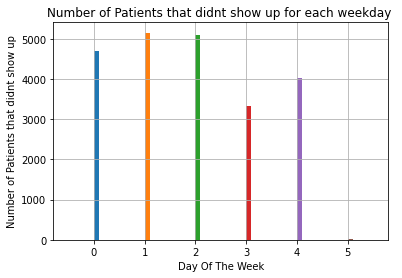

In [26]:
#Find the most common Day for which the patients do not show up the diagram shown is a histogram

df_nonshowers['AppointmentDay'] = pd.to_datetime(df_nonshowers['AppointmentDay'])
df_nonshowers['day_of_week'] = df_nonshowers['AppointmentDay'].dt.weekday
# df_nonshowers.to_csv("df_nonShowers.csv",index=False)
most_common_day = df_nonshowers.groupby(['day_of_week']).size().idxmax()
df_days = df_nonshowers.groupby(['day_of_week'])['day_of_week'];
df_days_size = df_nonshowers.groupby(['day_of_week']).size();
for name, daynum in days.items(): 
        if daynum == most_common_day:
            most_common_day = name 
            break
df_days.hist()
plt.ylabel("Number of Patients that didnt show up")
plt.xlabel("Day Of The Week")
plt.title("Number of Patients that didnt show up for each weekday ")


print("Most Common day that the patients don't show up is",most_common_day)


### Who is the most common patient that didn't show up?

In [14]:
#Find the id of the patient who didn't show up for his appointments the most
most_common_patient = df_nonshowers.groupby(['PatientId']).size().idxmax();
number_of_times = df_nonshowers.groupby(['PatientId']).size().max();
print("The most common patient who didn't show up is ",most_common_patient," he didn't show up for",number_of_times,"times")

The most common patient who didn't show up is  1421986987763  he didn't show up for 18 times


### Which disease is with the most number of non-showups?

Most Common non-showups are that of the patients suffering from HandCap


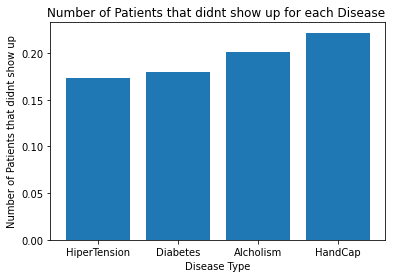

In [15]:
#Find the disease with the most number of non-showups 
df_diabetes = df[df['Diabetes']==1]
df_hipertension = df[df['Hipertension']==1]
df_alcoholism = df[df['Alcoholism']==1]
df_handcap = df[df['Handcap']==1]


number_of_Hipertension = df_nonshowers['Hipertension'].sum()/len(df_hipertension.index)
number_of_Diabetes = df_nonshowers['Diabetes'].sum() /len(df_diabetes.index)
number_of_Alcoholism = df_nonshowers['Alcoholism'].sum()/len(df_alcoholism.index)
number_of_Handcap = df_nonshowers['Handcap'].sum()/len(df_handcap.index)
locations = [1,2,3,4]
heights = [number_of_Hipertension, number_of_Diabetes,number_of_Alcoholism,number_of_Handcap]
labels = ['HiperTension', 'Diabetes','Alcholism','HandCap']
plt.bar(locations, heights, tick_label=labels)
plt.title('Number of Patients that didnt show up for each Disease ')
plt.xlabel('Disease Type')
plt.ylabel('Number of Patients that didnt show up');

print("Most Common non-showups are that of the patients suffering from HandCap")

### Is there a realation between HiperTension and no-show?

In [16]:
def myplot(X,NoShow,Show,X_axis,ylabel,title):
    plt.bar(X_axis - 0.2, NoShow, 0.4, label = 'No Show')
    plt.bar(X_axis + 0.2, Show, 0.4, label = 'Show')
    plt.xticks(X_axis, X)
    plt.xlabel("Groups")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

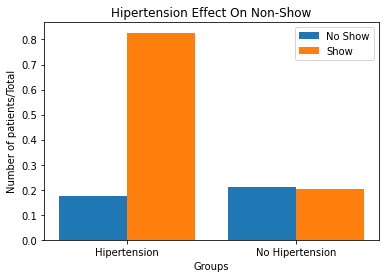

In [17]:
# Correlation between hipertension and no show
df_hipertension = df[df['Hipertension']==1]
df_nohipertension = df[df['Hipertension']==0]
sum_hipertension_noshow = df_hipertension[df['No-show']=='Yes']['Hipertension'].count()
sum_hipertension_show = df_hipertension[df['No-show']=='No']['Hipertension'].count()

sum_nohipertension_noshow = df_nohipertension[df['No-show']=='Yes']['Hipertension'].count()
sum_nohipertension_show = df_hipertension[df['No-show']=='No']['Hipertension'].count()

X = ['Hipertension','No Hipertension']
NoShow = [sum_hipertension_noshow/len(df_hipertension.index),sum_nohipertension_noshow/len(df_nohipertension.index)]
Show = [sum_hipertension_show/len(df_hipertension.index),sum_nohipertension_show/len(df_nohipertension.index)]
  
X_axis = np.arange(len(X))
  
myplot(X,NoShow,Show,X_axis,"Number of patients/Total","Hipertension Effect On Non-Show")




There is no effect on having hipertension and not showing up as shown in the figure, people having hiper tension have showed up much more than people who don't. 

### Is there a relation between Diabetes and no-show?

In [ ]:
# Correlation between diabetes and no show
df_diabetes = df[df['Diabetes']==1]
df_nodiabetes = df[df['Diabetes']==0]
sum_diabetes_noshow = df_diabetes[df['No-show']=='Yes']['Diabetes'].count()
sum_diabetes_show = df_diabetes[df['No-show']=='No']['Diabetes'].count()

sum_nodiabetes_noshow = df_nodiabetes[df['No-show']=='Yes']['Diabetes'].count()
sum_nodiabetes_show = df_nodiabetes[df['No-show']=='No']['Diabetes'].count()

X = ['Diabetes','No Diabetes']
NoShow = [sum_diabetes_noshow/len(df_diabetes.index),sum_nodiabetes_noshow/len(df_nodiabetes.index)]
Show = [sum_diabetes_show/len(df_diabetes.index),sum_nodiabetes_show/len(df_nodiabetes.index)]
  
X_axis = np.arange(len(X))
myplot(X,NoShow,Show,X_axis,"Number of patients/Total","Diabetes Effect On Non-Show")




This shows no correlation between the diabetes and the number of no-show as both diabetes and no diabetes are nearly the same in show and non-show

### Is there a relation between Alcoholism and no-show?

In [ ]:
# Correlation between Alcoholism and no show
df_alcoholism = df[df['Alcoholism']==1]
df_noalcoholism = df[df['Alcoholism']==0]
sum_alcoholism_noshow = df_alcoholism[df['No-show']=='Yes']['Alcoholism'].count()
sum_alcoholism_show = df_alcoholism[df['No-show']=='No']['Alcoholism'].count()

sum_noalcoholism_noshow = df_noalcoholism[df['No-show']=='Yes']['Alcoholism'].count()
sum_noalcoholism_show = df_alcoholism[df['No-show']=='No']['Alcoholism'].count()

X = ['Alcoholism','No Alcoholism']
NoShow = [sum_alcoholism_noshow/len(df_alcoholism.index),sum_noalcoholism_noshow/len(df_noalcoholism.index)]
Show = [sum_alcoholism_show/len(df_alcoholism.index),sum_noalcoholism_show/len(df_noalcoholism.index)]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, NoShow, 0.4, label = 'No Show')
plt.bar(X_axis + 0.2, Show, 0.4, label = 'Show')
myplot(X,NoShow,Show,X_axis,"Number of patients/Total","Alcoholism Effect On Non-Show")



### Is there a relation between Handcap and no-show?

In [ ]:
# Correlation between Handcap and no show
df_handcap = df[df['Handcap']==1]
df_nohandcap = df[df['Handcap']==0]
sum_handcap_noshow = df_handcap[df['No-show']=='Yes']['Handcap'].count()
sum_handcap_show = df_handcap[df['No-show']=='No']['Handcap'].count()

sum_nohandcap_noshow = df_nohandcap[df['No-show']=='Yes']['Handcap'].count()
sum_nohandcap_show = df_handcap[df['No-show']=='No']['Handcap'].count()

X = ['Handcap','No Handcap']
NoShow = [sum_handcap_noshow/len(df_handcap.index),sum_nohandcap_noshow/len(df_nohandcap.index)]
Show = [sum_handcap_show/len(df_handcap.index),sum_nohandcap_show/len(df_nohandcap.index)]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, NoShow, 0.4, label = 'No Show')
plt.bar(X_axis + 0.2, Show, 0.4, label = 'Show')
myplot(X,NoShow,Show,X_axis,"Number of patients/Total","Handcap Effect On Non-Show")


There is no effect on having Handcap and not showing up as shown in the figure, people having Handcap have showed up much more than people who don't. 

### Is there a relation between Not Recieving and SMS and no-show?

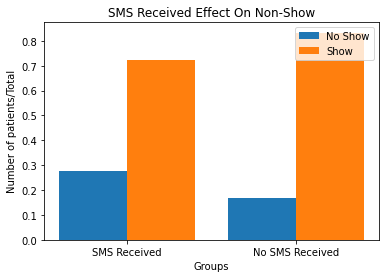

In [27]:

# Correlation between SMS_received and no show
df_SMS_received = df[df['SMS_received']==1]
df_noSMS_received = df[df['SMS_received']==0]

sum_SMS_received_noshow = df_SMS_received[df['No-show']=='Yes']['SMS_received'].count()
sum_SMS_received_show = df_SMS_received[df['No-show']=='No']['SMS_received'].count()

sum_noSMS_received_noshow = df_noSMS_received[df['No-show']=='Yes']['SMS_received'].count()
sum_noSMS_received_show = df_noSMS_received[df['No-show']=='No']['SMS_received'].count()

X = ['SMS Received','No SMS Received']
NoShow = [sum_SMS_received_noshow/len(df_SMS_received.index),sum_noSMS_received_noshow/len(df_noSMS_received.index)]
Show = [sum_SMS_received_show/len(df_SMS_received.index),sum_noSMS_received_show/len(df_noSMS_received.index)] 
X_axis = np.arange(len(X))
myplot(X,NoShow,Show,X_axis,"Number of patients/Total","SMS Received Effect On Non-Show")


This shows that when no SMS is recieved more patients don't show up andd less show

<a id='conclusions'></a>
## Conclusions
### Results:<br>
1.Given Each weekday Tuesday is the most common day that patients don't show up in.<br>
2.The hospital location having the highest number of non-shows is JARDIM CAMBURI.<br>
3.Patients suffering from HandCap are the ones who didn't show up for the appointments the most while patients suffering from Hipertension are the least ones that didn't show up for their appointments.<br>
4.Hiper tension ,Handcap, Alcoholism patients results showed that there is no effect on having these diseases and not showing up, and as shown in the figures above people having these diseases have showed up much more than people who don't.However Diabetes patients results showed no correlation between the diabetes and the number of no-show as both diabetes and no diabetes are nearly the same in show and non-show.<br>
5.After investigating the effect on recieving SMS it was found that when no SMS is recieved more patients don't show up and less show.<br>
### Limitations: These are the limitations I faced when analysing the dataset:<br>
1.The data is mostly either a yes or no (categorical) so its hard to analyse correlations between features of the dataset and understand each feature more  
2.Couldn't compute any mean, median or plot a box-plot to the dataset due to the fact that the data is categorical as mentioned above.
